# PREDICTIVE MAINTENANCE ANALYSIS

### 1) Importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 2) Loading the dataset

In [2]:
df = pd.read_csv('predictive_maintenance.csv')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


### 3) Data Description

- This data is about the drilling tool used in a lathe machine.
- The columns consist values of:
    1. Air temperature in Kelvin (K)
    2. Process temperature in Kelvin (K)
    3. Rotational speed in Rotation per minute (RPM)
    4. Torque in Newton meters (Nm)
    5. Tool wear in minutes (min)
- Type column is given to represent the type of product with respect to its quality. 
>L, M and H are for Low, Medium and High quality products respectively.
- ProductID consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number.
- The target column is the output of machine, if it is failing or not.
>0 represents no failure whereas 1 represents that failure has occured.
- An additional column of Failure Type is given so that we can understand what type of failure is occuring.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [4]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


_The above table shows us that our data is normally distributed since all the mean and median values are close to each other. So there is no need for skewness removal._

### 4) Exploratory Data Analysis (EDA)

In [5]:
df['Target'].value_counts()

0    9661
1     339
Name: Target, dtype: int64

<AxesSubplot:title={'center':'Machine Failure'}, ylabel='Target'>

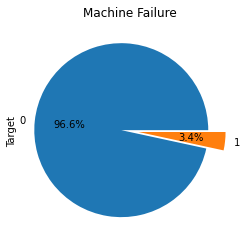

In [6]:
df['Target'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%.1f%%',title="Machine Failure")

_The above Pie chart shows that only 3.4% of times our machine is failing. Though the failure rate is very low in comparison to success rate, we still need to avoid any failure in order to improve productivity of the machine._

In [7]:
df['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

Here we can see the types of failures such as:
  1. Heat Dissipation Failure : The failure that occurs due to overheating of the tool.
  2. Power Failure : The failure occuring due to power cutout.
  3. Overstrain Failure : Failure because of excessive strain on the tool.
  4. Tool Wear Failure : Failure due to tool wear and tear that happens after excessive use of tool.
  5. Random Failures : Random Failures can be any failure whose cause can't be assessed or any human error.
  
"No failure" as the name suggests means there is no failure of machine

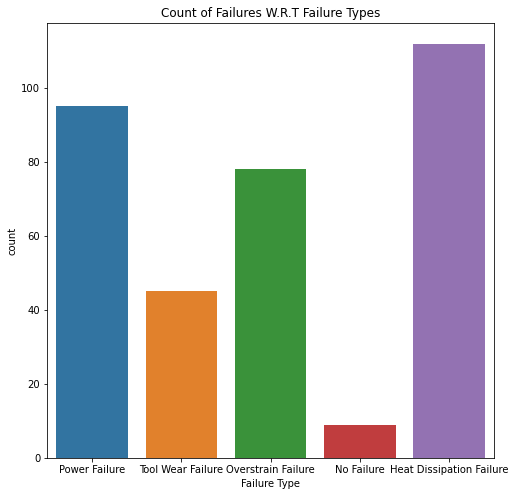

In [8]:
plt.figure(figsize = (8,8))
sns.countplot(data = df[df['Target'] == 1], x = "Failure Type")
plt.title("Count of Failures W.R.T Failure Types")
plt.show()

_In the above countplot we can see that "No Failure" is also plotted but that does not makes any sense. This means there are some fake values in the data. So we need to eliminate them._

In [9]:
df[(df['Target']==1) & (df['Failure Type']=='No Failure')]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1437,1438,H30851,H,298.8,309.9,1439,45.2,40,1,No Failure
2749,2750,M17609,M,299.7,309.2,1685,28.9,179,1,No Failure
4044,4045,M18904,M,301.9,310.9,1419,47.7,20,1,No Failure
4684,4685,M19544,M,303.6,311.8,1421,44.8,101,1,No Failure
5536,5537,M20396,M,302.3,311.8,1363,54.0,119,1,No Failure
5941,5942,L53121,L,300.6,310.7,1438,48.5,78,1,No Failure
6478,6479,L53658,L,300.5,309.8,1663,29.1,145,1,No Failure
8506,8507,L55686,L,298.4,309.6,1710,27.3,163,1,No Failure
9015,9016,L56195,L,297.2,308.1,1431,49.7,210,1,No Failure


In [10]:
i = df[(df['Target']==1) & (df['Failure Type']=='No Failure')].index
df.drop(i,axis=0,inplace=True)

_Also, we cannot see anything related to Random Failures since they cannot be assesed. So we will drop the products with Random failures._

In [11]:
df[(df['Target']==0) & (df['Failure Type']=='Random Failures')]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1221,1222,M16081,M,297.0,308.3,1399,46.4,132,0,Random Failures
1302,1303,L48482,L,298.6,309.8,1505,45.7,144,0,Random Failures
1748,1749,H31162,H,298.4,307.7,1626,31.1,166,0,Random Failures
2072,2073,L49252,L,299.6,309.5,1570,35.5,189,0,Random Failures
2559,2560,L49739,L,299.3,309.0,1447,50.4,140,0,Random Failures
3065,3066,M17925,M,300.1,309.2,1687,27.7,95,0,Random Failures
3452,3453,H32866,H,301.6,310.5,1602,32.3,2,0,Random Failures
5471,5472,L52651,L,302.7,312.3,1346,61.2,170,0,Random Failures
5489,5490,L52669,L,302.6,312.1,1499,35.0,215,0,Random Failures
5495,5496,H34909,H,302.9,312.5,1357,55.0,12,0,Random Failures


### 5) Hypothesis Testing

#### The main question arises here is that, does the rotational speed (RPM) significantly affect the failure type of a product in our manufacturing process?
- For this we have to conduct a test we are implementing chi-square test
- For that, Null Hypothesis (H0): The rotational speed (RPM) does not significantly affect the failure type of a product.

- Alternative Hypothesis (H1): The rotational speed (RPM) significantly affects the failure type of a product.

To test this hypothesis, we can perform a chi-squared test of independence between the "Rotational speed [rpm]" and "Failure Type" variables. The chi-squared test will help us determine whether there is a significant association between these two categorical variables.

In [12]:
from scipy.stats import chi2_contingency

In [13]:
# Create a contingency table between Rotational speed and Failure Type
contingency_table = pd.crosstab(df['Rotational speed [rpm]'], df['Failure Type'])

In [14]:
# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

In [15]:
# Define the significance level (alpha)
alpha = 0.05

In [16]:
# Compare the p-value to alpha to determine statistical significance
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between Rotational speed and Failure Type.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between Rotational speed and Failure Type.")

Reject the null hypothesis: There is a significant association between Rotational speed and Failure Type.


- This chi-squared test helped us to determine whether the rotational speed significantly affects the failure type in the manufacturing process.

### 6) Data Visualization

In [17]:
i = df[(df['Target']==0) & (df['Failure Type']=='Random Failures')].index
df.drop(i,axis=0,inplace=True)

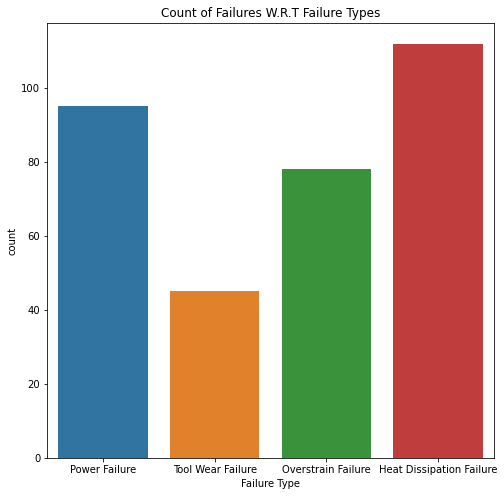

In [18]:
plt.figure(figsize = (8,8))
sns.countplot(data = df[df['Target'] == 1], x = "Failure Type")
plt.title("Count of Failures W.R.T Failure Types")
plt.show()

_Here we can see that most of our failures are  __Heat Dissipation Failure__, then __Power Failure__ followed by __Overstrain__ and __Tool Wear Failures__._

<AxesSubplot:title={'center':'Percentage of Product Types'}, ylabel='Type'>

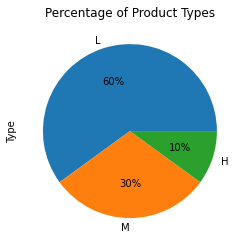

In [19]:
df['Type'].value_counts().plot(kind='pie',autopct='%.f%%',title="Percentage of Product Types")

_We can see that most of our products i.e. 60%, belong to low quality category. 30% belong to medium quality and 10% to high quality categories._

In [20]:
pd.DataFrame(df["Type"].value_counts())

,Type
L,5984
M,2991
H,998


<AxesSubplot:>

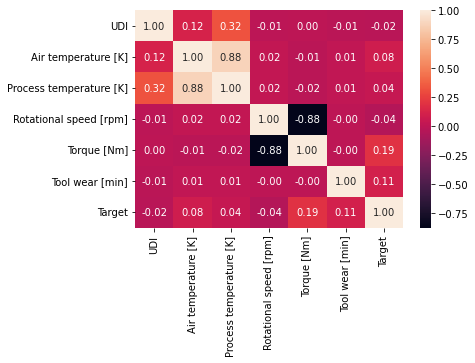

In [21]:
sns.heatmap(df.corr(),annot=True,fmt=".2f")

_From above heatmap, we can see that there is no correlation between any two columns._

In [22]:
df.head(1)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure


In [23]:
colname=df.iloc[:,2:8].columns

Type


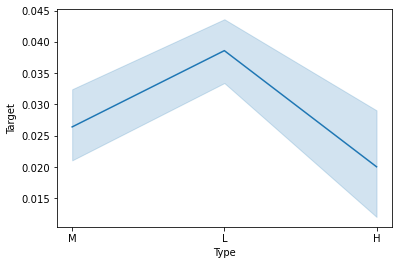

Air temperature [K]


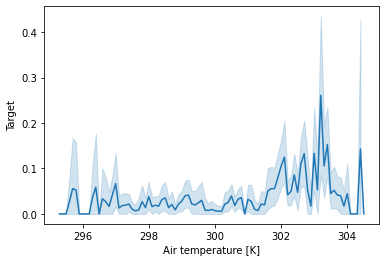

Process temperature [K]


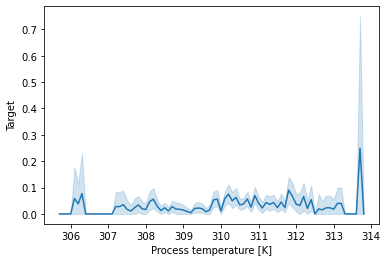

Rotational speed [rpm]


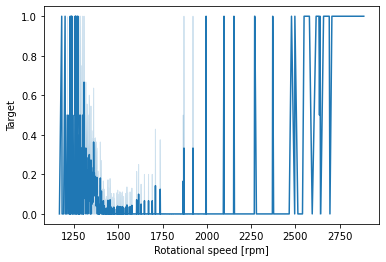

Torque [Nm]


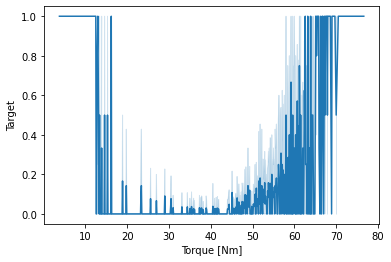

Tool wear [min]


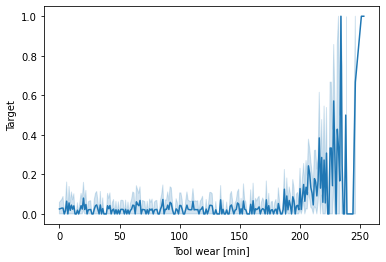

In [24]:
for i in df[colname]:
    print(i)
    
    sns.lineplot(df[i],df['Target'])
    plt.show()

_Here we can see that Rotational speed [rpm], Torque [Nm], Tool wear [min] are highly affecting our Target column_

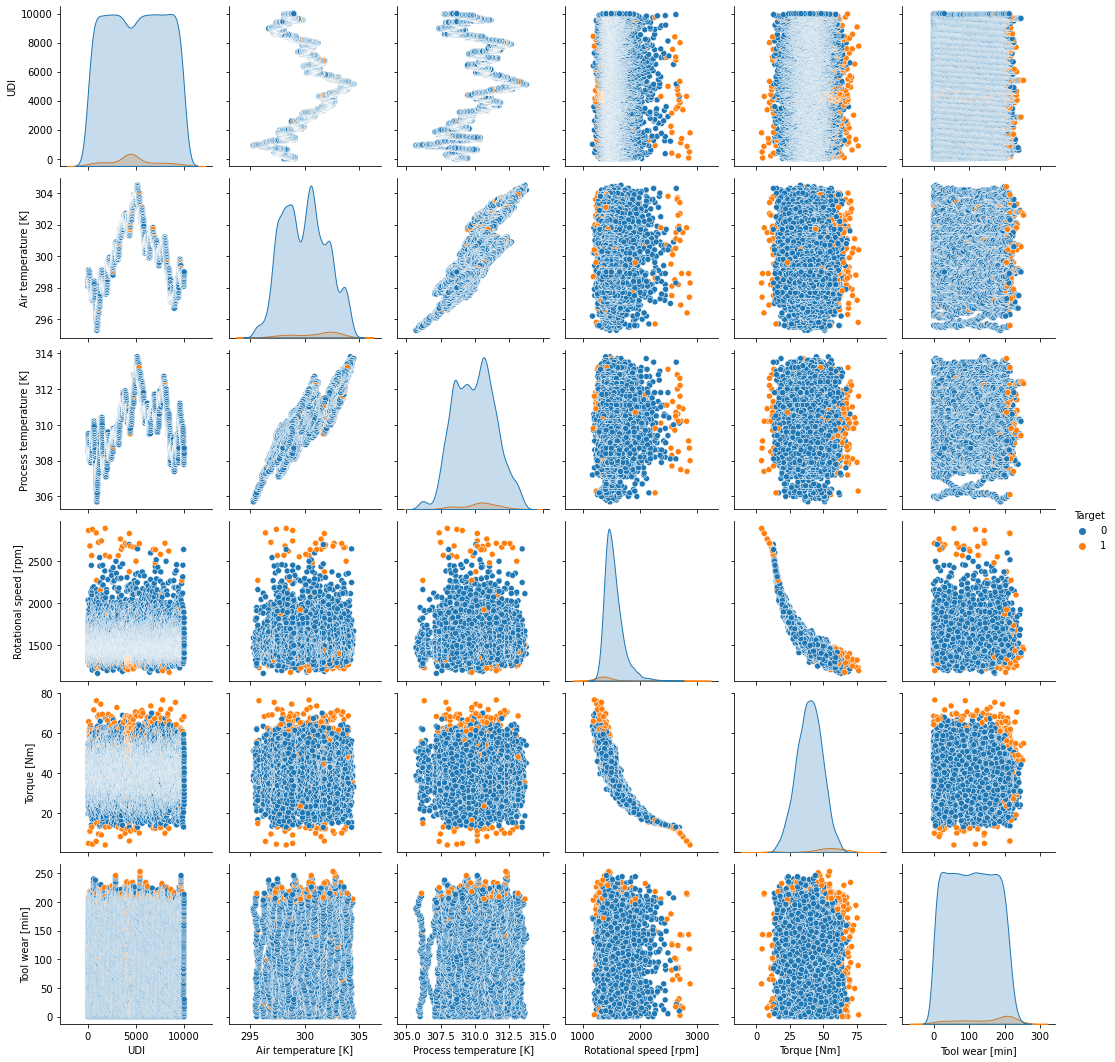

In [25]:
sns.pairplot(df,hue='Target')

### 6) Predictive Modelling

In [26]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [27]:
df.drop(['UDI','Product ID','Failure Type'],axis=1,inplace=True)

_Here we dropped all the columns that we don't require._

In [28]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


In [29]:
df["Type"] = df["Type"].replace("L",0)
df["Type"] = df["Type"].replace("M",1)
df["Type"] = df["Type"].replace("H",2)

_Replacing the categorical values of Type column into numeric values._

In [30]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,1,298.1,308.6,1551,42.8,0,0
1,0,298.2,308.7,1408,46.3,3,0
2,0,298.1,308.5,1498,49.4,5,0
3,0,298.2,308.6,1433,39.5,7,0
4,0,298.2,308.7,1408,40.0,9,0


In [31]:
predictors = df.iloc[:,:-1]
predictors

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,1,298.1,308.6,1551,42.8,0
1,0,298.2,308.7,1408,46.3,3
2,0,298.1,308.5,1498,49.4,5
3,0,298.2,308.6,1433,39.5,7
4,0,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...
9995,1,298.8,308.4,1604,29.5,14
9996,2,298.9,308.4,1632,31.8,17
9997,1,299.0,308.6,1645,33.4,22
9998,2,299.0,308.7,1408,48.5,25


In [32]:
label = df.iloc[:,-1]
label

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Target, Length: 9973, dtype: int64

### Splitting data into train and test

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(predictors,label,test_size=0.3,random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
from sklearn.metrics import accuracy_score,classification_report

In [35]:
def mymodel(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    return model

_Here we created a function to check which Machine Learning Algorithm will be the best fit for our model. We will select the one with highest accuracy._

In [36]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2903
           1       0.73      0.21      0.33        89

    accuracy                           0.97      2992
   macro avg       0.85      0.61      0.66      2992
weighted avg       0.97      0.97      0.97      2992



LogisticRegression()

In [37]:
mymodel(knn)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2903
           1       0.53      0.22      0.31        89

    accuracy                           0.97      2992
   macro avg       0.75      0.61      0.65      2992
weighted avg       0.96      0.97      0.97      2992



KNeighborsClassifier()

In [38]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2903
           1       0.66      0.74      0.70        89

    accuracy                           0.98      2992
   macro avg       0.83      0.86      0.84      2992
weighted avg       0.98      0.98      0.98      2992



DecisionTreeClassifier()

_We can see that Decision Tree Classifier is best suited for our model since it has the highest accuracy of all i.e. 98%_

In [39]:
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

1.0
0.9809491978609626


_Our training and testing scores are a little different from each other. But we need scores close to each other for our model to work best._ 

### Hyperparameter Tuning

In [40]:
for i in range(1,51):
    dt1 = DecisionTreeClassifier(max_depth=i)
    dt1.fit(X_train,y_train)
    y_pred = dt1.predict(X_test)
    print(f"{i} = {accuracy_score(y_test,y_pred)}")

1 = 0.9669117647058824
2 = 0.9749331550802139
3 = 0.9789438502673797
4 = 0.9792780748663101
5 = 0.9799465240641712
6 = 0.9836229946524064
7 = 0.9862967914438503
8 = 0.9859625668449198
9 = 0.9842914438502673
10 = 0.9829545454545454
11 = 0.9832887700534759
12 = 0.9836229946524064
13 = 0.9836229946524064
14 = 0.9822860962566845
15 = 0.9806149732620321
16 = 0.9802807486631016
17 = 0.9812834224598931
18 = 0.9792780748663101
19 = 0.9806149732620321
20 = 0.981951871657754
21 = 0.981951871657754
22 = 0.9816176470588235
23 = 0.9806149732620321
24 = 0.9802807486631016
25 = 0.9809491978609626
26 = 0.9796122994652406
27 = 0.981951871657754
28 = 0.9802807486631016
29 = 0.9806149732620321
30 = 0.9809491978609626
31 = 0.9802807486631016
32 = 0.981951871657754
33 = 0.9809491978609626
34 = 0.9799465240641712
35 = 0.981951871657754
36 = 0.9816176470588235
37 = 0.9806149732620321
38 = 0.9822860962566845
39 = 0.9809491978609626
40 = 0.9806149732620321
41 = 0.9809491978609626
42 = 0.9809491978609626
43 = 0

_Here, the maximum accuracy is on index 8, so we will select max_depth = 8_

In [41]:
for i in range(2,51):
    dt2 = DecisionTreeClassifier(min_samples_split=i)
    dt2.fit(X_train,y_train)
    y_pred = dt2.predict(X_test)
    print(f"{i} = {accuracy_score(y_test,y_pred)}")

2 = 0.9812834224598931
3 = 0.981951871657754
4 = 0.9806149732620321
5 = 0.9822860962566845
6 = 0.9829545454545454
7 = 0.9812834224598931
8 = 0.982620320855615
9 = 0.9829545454545454
10 = 0.9822860962566845
11 = 0.9829545454545454
12 = 0.982620320855615
13 = 0.982620320855615
14 = 0.982620320855615
15 = 0.982620320855615
16 = 0.9829545454545454
17 = 0.9829545454545454
18 = 0.9832887700534759
19 = 0.9832887700534759
20 = 0.9846256684491979
21 = 0.983957219251337
22 = 0.9856283422459893
23 = 0.9856283422459893
24 = 0.9852941176470589
25 = 0.983957219251337
26 = 0.9846256684491979
27 = 0.983957219251337
28 = 0.9849598930481284
29 = 0.9842914438502673
30 = 0.9849598930481284
31 = 0.9849598930481284
32 = 0.9842914438502673
33 = 0.9842914438502673
34 = 0.9859625668449198
35 = 0.9846256684491979
36 = 0.9852941176470589
37 = 0.9852941176470589
38 = 0.9846256684491979
39 = 0.9852941176470589
40 = 0.9846256684491979
41 = 0.9852941176470589
42 = 0.9852941176470589
43 = 0.9846256684491979
44 = 0.98

_Here, the maximum accuracy is on index 34, so we will select min_samples_split = 34_

In [42]:
for i in range(1,51):
    dt3 = DecisionTreeClassifier(min_samples_leaf=i)
    dt3.fit(X_train,y_train)
    y_pred = dt3.predict(X_test)
    print(f"{i} = {accuracy_score(y_test,y_pred)}")

1 = 0.9829545454545454
2 = 0.9812834224598931
3 = 0.9849598930481284
4 = 0.9869652406417112
5 = 0.9846256684491979
6 = 0.9869652406417112
7 = 0.9842914438502673
8 = 0.9846256684491979
9 = 0.9842914438502673
10 = 0.9866310160427807
11 = 0.9866310160427807
12 = 0.9869652406417112
13 = 0.9879679144385026
14 = 0.9879679144385026
15 = 0.9876336898395722
16 = 0.9862967914438503
17 = 0.9846256684491979
18 = 0.9856283422459893
19 = 0.9852941176470589
20 = 0.9852941176470589
21 = 0.9862967914438503
22 = 0.9859625668449198
23 = 0.9846256684491979
24 = 0.9846256684491979
25 = 0.983957219251337
26 = 0.983957219251337
27 = 0.9829545454545454
28 = 0.9816176470588235
29 = 0.9809491978609626
30 = 0.9809491978609626
31 = 0.9789438502673797
32 = 0.9789438502673797
33 = 0.9789438502673797
34 = 0.9752673796791443
35 = 0.9742647058823529
36 = 0.9739304812834224
37 = 0.973596256684492
38 = 0.973596256684492
39 = 0.973596256684492
40 = 0.973596256684492
41 = 0.973596256684492
42 = 0.973596256684492
43 = 0.97

_Here, the maximum accuracy is on index 12, so we will select min_samples_leaf = 12_

In [43]:
dt4 = DecisionTreeClassifier(max_depth=8,min_samples_leaf=34,min_samples_split=12)
mymodel(dt4)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2903
           1       0.61      0.48      0.54        89

    accuracy                           0.98      2992
   macro avg       0.79      0.74      0.76      2992
weighted avg       0.97      0.98      0.97      2992



DecisionTreeClassifier(max_depth=8, min_samples_leaf=34, min_samples_split=12)

In [44]:
print(dt4.score(X_train,y_train))
print(dt4.score(X_test,y_test))

0.974645466265578
0.9752673796791443


_Now, we are getting both training and testing scores almost equal._

### Creating model

In [45]:
def predtest():
    Type = int(input("Enter type of product based on quality.\nIf Low, enter 0.\nIf Medium, enter 1.\nIf High, enter 2.\nYou entered : "))
    Airtemp = eval(input("Enter Air Temperature in K : "))
    Protemp = eval(input("Enter Process Temperature in K : "))
    Rotsp = int(input("Enter Rotational Speed in RPM : "))
    Torq = eval(input("Enter Torque in Nm : "))
    Toolw = int(input("Enter Tool Wear in min : "))
    
    newx = [Type,Airtemp,Protemp,Rotsp,Torq,Toolw]
    yp = dt4.predict([newx])[0]
    
    if yp==1:
        print("Machine Failed")
        return yp
    else:
        print("Machine didn't Fail")
        return yp  

_In order to check if our model is working properly or not, we need to test it._

_Here we have some existing values of the given parameters for testing failure._

### Model testing

__Testing if our model is properly working or not.__

>Example:-
- Type = M
- Air temperature [K] = 298.2
- Process temperature [K] = 308.5
- Rotational speed [rpm] = 2678
- Torque [Nm] = 10.7
- Tool wear [min] = 86
- Target = 1

__Here the machine should fail.__

In [46]:
predtest()

Enter type of product based on quality.
If Low, enter 0.
If Medium, enter 1.
If High, enter 2.
You entered : 1
Enter Air Temperature in K : 298.2
Enter Process Temperature in K : 308.5
Enter Rotational Speed in RPM : 2678
Enter Torque in Nm : 10.7
Enter Tool Wear in min : 86
Machine Failed


1

>Example:-
- Type = H
- Air temperature [K] = 298.4
- Process temperature [K] = 308.9
- Rotational speed [rpm] = 1782
- Torque [Nm] = 23.9
- Tool wear [min] = 24
- Target = 0

__Here the machine should not fail.__

In [47]:
predtest()

Enter type of product based on quality.
If Low, enter 0.
If Medium, enter 1.
If High, enter 2.
You entered : 2
Enter Air Temperature in K : 298.4
Enter Process Temperature in K : 308.9
Enter Rotational Speed in RPM : 1782
Enter Torque in Nm : 23.9
Enter Tool Wear in min : 24
Machine didn't Fail


0

_Since the outcome is correct. Our model is successful._

## Prescriptive Analysis

- __After studying the dataset, we can see that machine failure is mainly occuring because of 3 reasons:__
   1. Improper rotational speed of the tool.
   2. Torque not maintained as per the requirement.
   3. High tool wear.

- __Air temperature and Process temperature are not playing any major role in machine failure.__

- __Low quality products are more likely to fail compared to medium quality and high quality products.__

- __Heat dissipation failure is the most occuring failure which causes due to overheating of the tool.__

- __Power failure is also a major problem causing machine failure__

>__Measures to take in order to avoid failure.__ 
   1. User must set the rotational speed properly. Not too high and also not too low.
   2. User should not set the torque too high or too low. Torque should be set as per the tool requirement.
   3. User should not use the same tool for long period of time. Since tools may wear due to excessive usage.
   4. High quality and medium quality products should be used more frequently.
   5. Overheating of tool must be avoided by constantly providing coolant to the tool. 
   6. Secondary power input shoould be provided in case of power failure